In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("spotify-2023.csv",encoding = 'latin-1')
df # this loads the table

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Overview of Dataset


#### How many rows and columns does the dataset contain?


In [102]:
size = df.shape # gets the shape of the data frame
print("the size of the data is: ", size) #outputs the size


the size of the data is:  (953, 24)


The dataset contains 953 rows and 24 columns

##### What are the data types of each column? Are there any missing values?s

In [104]:
datas = df.dtypes #gets the data type of each column
print("The Data types of each columns are: " ) #outputs the data types
datas

The Data types of each columns are: 


track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

Upon observing the data types, some data are in data type of object such as streams, deezer playlists, and shazam charts. So, we have to turn these data types into int

In [9]:
# we will convert the streams, in deezer playlists and in shazam charts column to a float
df['streams'] = pd.to_numeric(df['streams'], errors='coerce') 
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = df['in_shazam_charts'].astype(str).str.replace(',', '').astype(float)


In [10]:
No_value = df.isnull().sum() # to see which columns has how many missing values
print("These are the columns that have how many NaN values")
print(No_value[No_value>0]) # sets a parameter so that it only shows that has columns who has no values greater than 0

These are the columns that have how many NaN values
streams                 1
in_deezer_playlists    79
in_shazam_charts       50
key                    95
dtype: int64


After turning the data types into integers, we will now check for missing datas

### Finding the missing datas

In [13]:
# Finding duplicates of tracknames or artists
duplicate_value = df[df.duplicated(subset=['artist(s)_name','track_name'])] # checks for duplicates 
print("These are the rows that are duplicated")
duplicate_value # prints the rows that are duplicates


These are the rows that are duplicated


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854.0,1,...,166,C#,Major,70,57,57,9,20,11,7
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334.0,174,...,121,G#,Major,75,53,74,2,0,11,5
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473.0,242,...,109,A#,Minor,84,72,74,10,0,34,7
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595.0,3,...,170,NaN,Major,56,52,64,11,0,45,7


In [14]:
df_NaNValue = df.dropna(subset = ['track_name','in_shazam_charts','key','streams']) #drops the rows that have Null Values 

final_df = df_NaNValue.drop_duplicates(subset = ['track_name','artist(s)_name']) #removes duplicated rows

# sorts the values in a descending order so that the highest streams is first
final_df
sorted_final_df = final_df.sort_values(by = 'streams', ascending=False).reset_index(drop = True) 
final_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


# Basic Descriptive Statistics

What are the mean, median, and standard deviation of the streams column?

### What are the mean, median, and standard deviation of the streams column?

In [18]:
average = final_df['streams'].mean()
median = final_df['streams'].median()
std = final_df['streams'].std()
print("The mean is: ", average)
print("The median is: ", median)
print("The standard deviation is: ", std)

The mean is:  468922407.2521525
The median is:  263453310.0
The standard deviation is:  523981505.32150424


### What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

<Figure size 1000x600 with 0 Axes>

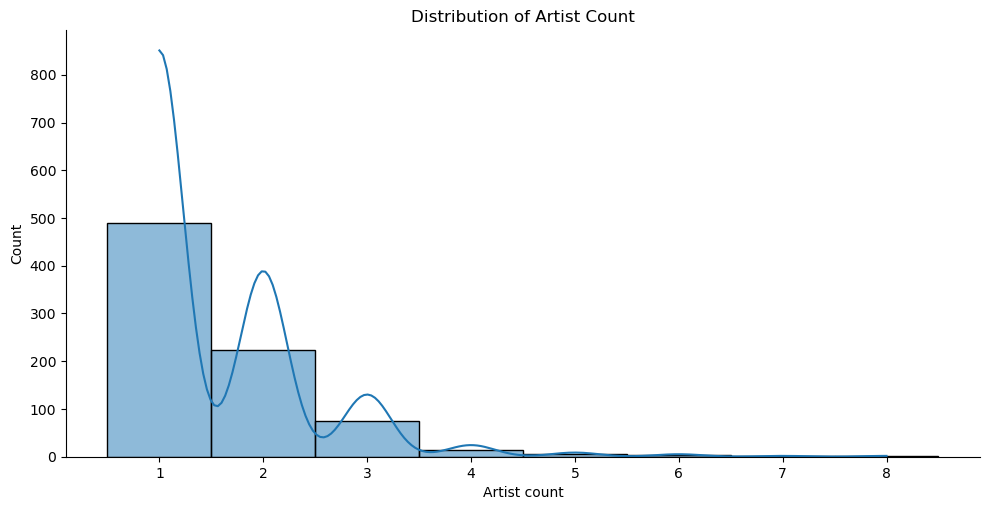

<Figure size 1000x600 with 0 Axes>

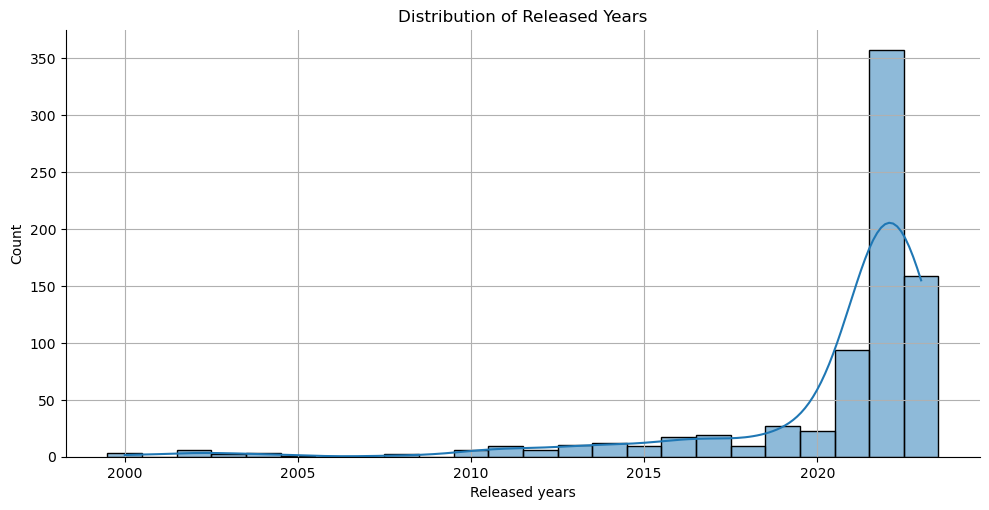

In [20]:
# Histogram for artist_count
plt.figure(figsize=(10, 6)) #set graph size
sns.displot(final_df, x = 'artist_count', kde = True, discrete = True,aspect = 2) #inputting data for the histogram plot for released_years
plt.title("Distribution of Artist Count")  #setting a title
plt.xlabel("Artist count") #setting x label
plt.ylabel("Count") #setting y label
plt.show() #adding a grid to the plot

# histogram for released_year
years = final_df[final_df['released_year'] >= 2000]['released_year'] #setting a limit of released_year only greater than 2000
plt.figure(figsize=(10, 6)) # setting graph size
sns.displot(final_df, x = years, kde = True, discrete = True, aspect = 2) #inputting data for the histogram plot for released_years
plt.title('Distribution of Released Years') #setting a title
plt.xlabel("Released years") #setting x label
plt.ylabel("Count") #setting y label
plt.grid() #adding a grid to the plot
plt.show()

### Checking for outliers in the data

In [22]:
def outlierfinder(final_df): #setting a user defined function to find outliers
    q1 = final_df.quantile(0.25) #setting 1st quartile
    q3 = final_df.quantile(0.75) #setting third quartile
    IQR = q3-q1 #formula for IQR
    outliers = final_df[((final_df<(q1-1.5*IQR)) | (final_df>(q3+1.5*IQR)))] #formula to find outliers in the data frame
    return outliers # returns the outlier

artistcount_outlier =  outlierfinder(final_df['artist_count']).shape[0] #finding outlier in the artist_count
print("Number of outliers in artist count is: ", artistcount_outlier) #outputs the number of outliers

yearoutlier = outlierfinder(final_df['released_year']).shape[0] #finding outlier in released_year
print("Number of outliers in released year is: ", yearoutlier) #outputs the number of outliers



Number of outliers in artist count is:  24
Number of outliers in released year is:  180


In [23]:
# this code outputs the highest number of streams
higheststreams = final_df.sort_values(by = 'streams', ascending=False).reset_index(drop = True) # this also sorts the values in a descending order so that the highest streams is first
higheststreams.head() # Displays the first 5 indexes



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
1,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5
2,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2.713922e+09,433,...,104,C#,Major,77,36,63,1,0,36,5
3,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2.665344e+09,492,...,170,C#,Major,59,48,76,4,0,10,5
4,Believer,Imagine Dragons,1,2017,1,31,18986,23,2.594040e+09,250,...,125,A#,Minor,77,74,78,4,0,23,11


## Observation

### It can be seen that Shape of You has the highest streams, followed by Sunflower, One dance, Stay, and Believer

# Top Performers

#### Who are the top 5 most frequent artists based on the number of tracks in the dataset?

In [27]:
# https://www.tutorialspoint.com/how-to-display-most-frequent-value-in-a-pandas-series#:~:text=One%20way%20to%20display%20the,the%20series%20as%20its%20index.
artist_split = final_df['artist(s)_name'].str.split(', ') # since theyre separated by a comma
artist_unique = artist_split.explode()
topartists = artist_unique.value_counts()
topartists.head()

artist(s)_name
Bad Bunny         36
Taylor Swift      32
The Weeknd        26
Kendrick Lamar    23
Feid              21
Name: count, dtype: int64

## Observation

### The top 5 frequent artists by their number of tracks are Taylor swift, SZA, Bad Bunny, The Weeknd, and Harry Styles.

### Temporal Trends

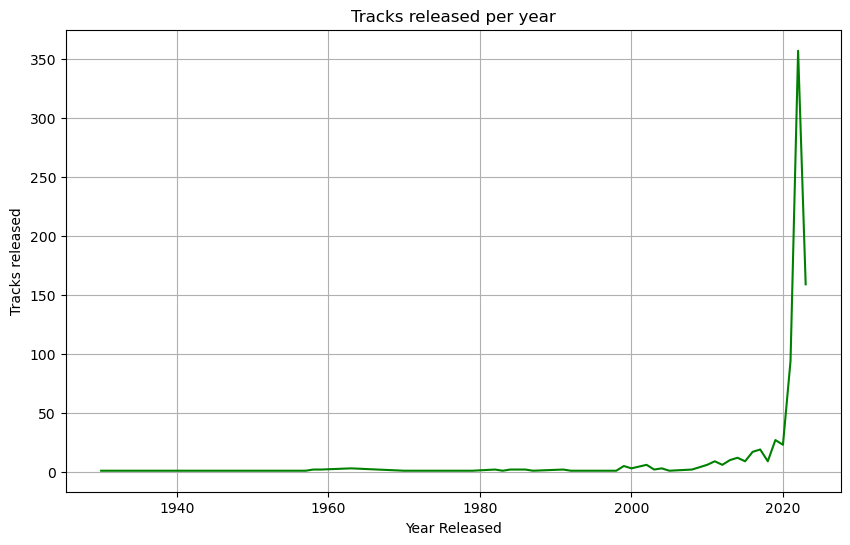

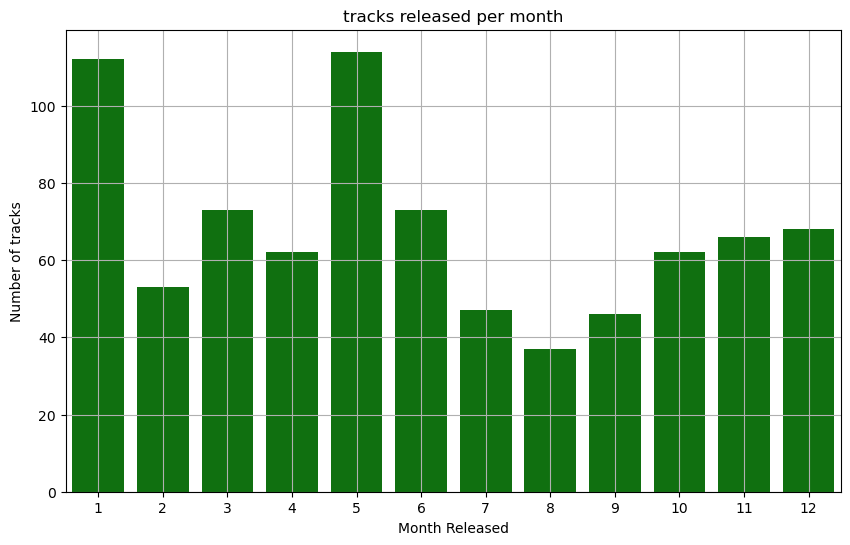

In [70]:
tracksperyear = final_df.groupby('released_year').size().reset_index(name = 'track_count') ## https://www.datacamp.com/tutorial/pandas-split-apply-combine-groupby?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720824&utm_adgroupid=157156376311&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=684592140434&utm_targetid=dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=9060943&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-row-p2_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-oct24&gad_source=1&gclid=EAIaIQobChMIq9L44I29iQMVZNIWBR2mFxQuEAAYASAAEgKzJfD_BwE

plt.figure(figsize=(10, 6))
sns.lineplot(data = tracksperyear, x = 'released_year', y = 'track_count', color = 'green')
plt.grid()
plt.xlabel("Year Released")
plt.ylabel("Tracks released")
plt.title("Tracks released per year")
plt.show()

trackspermonth = final_df.groupby('released_month').size().reset_index(name = 'track_count', )
plt.figure(figsize=(10, 6))
sns.barplot(data = trackspermonth,x = 'released_month',y = 'track_count',width = .8, color = 'green')
plt.grid()
plt.title("tracks released per month")
plt.xlabel("Month Released")
plt.ylabel("Number of tracks")
plt.show()

## Observation

### It can be seen that in the months of january and may has the highest number of tracks. 

### Genre and Music Characteristics


In [33]:
# Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

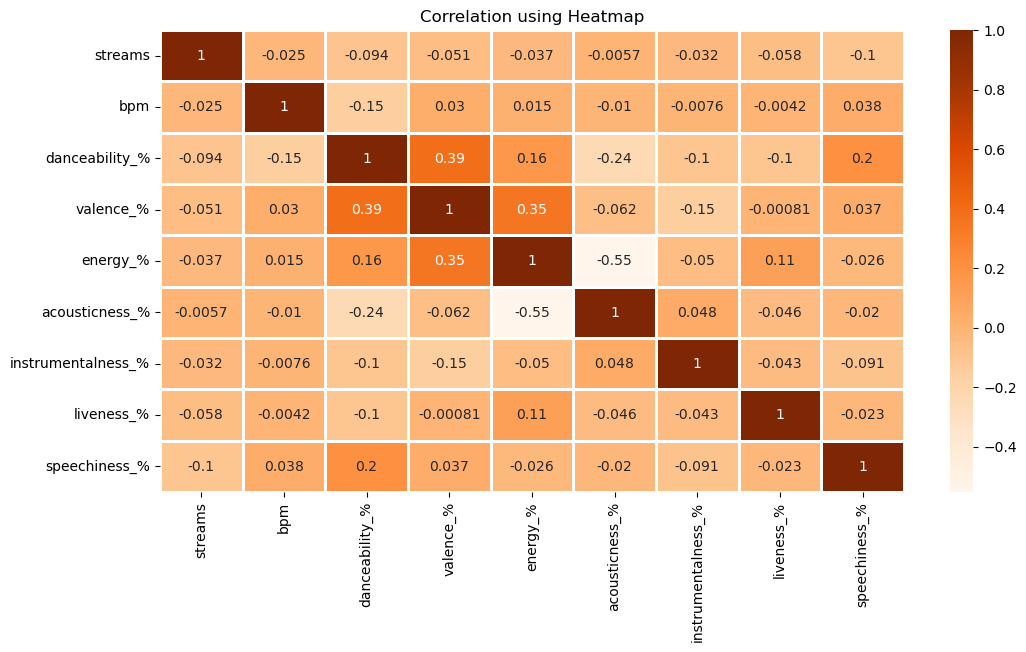

In [79]:
dataneeded = final_df[['streams','bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%','liveness_%','speechiness_%'  ]] 
correlation_matrix = dataneeded.corr() # https://www.geeksforgeeks.org/python-pandas-dataframe-corr/ # computes for the correlation
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=.8, cmap = 'Oranges')
plt.title("Correlation using Heatmap")
plt.show()

## Observation
### It can be seen that is a correlation in the valence and danceability and valence and energy. This could mean that alot of listeners prefer their songs on which has a good energy, can make choreographies, and a positive type of song.


#### Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?
### For the correlation between danceability_% and energy_%? there is a low positive correlation whilst for valence_% and acousticness_%? there is a low negative correlation


## Platform Popularity

In [37]:
#making a pie chart How do the numbers of tracks in spotify_playlists, deezer_playlist, and apple_playlists compare? Which platform seems to favor the most popular tracks?

The number of tracks in Spotify, Apple, and Deezer are:  [3943504, 48719, 69618.0] respectively


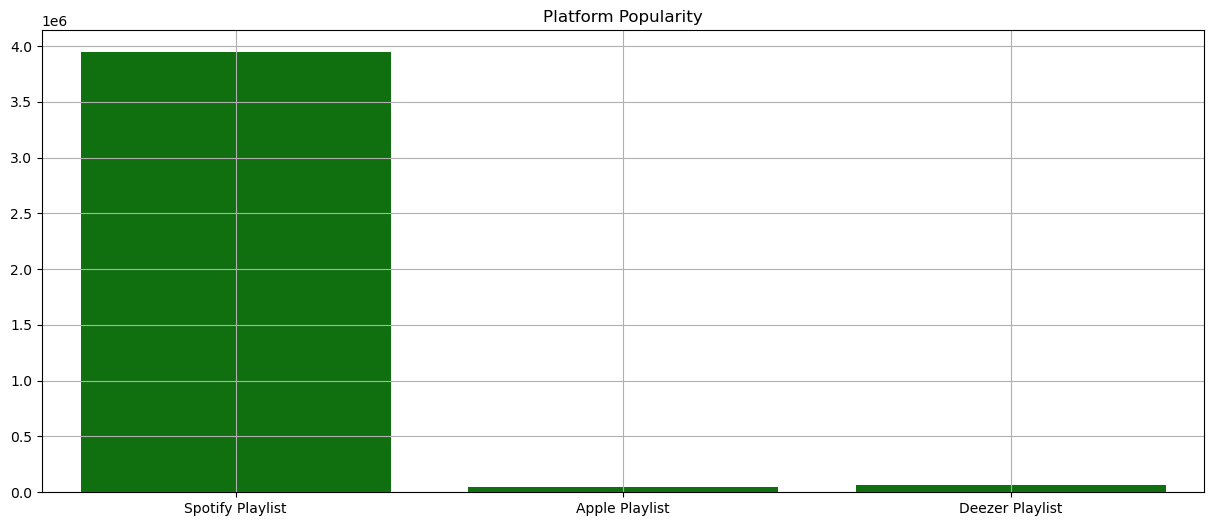

In [93]:
playlists = [
    final_df['in_spotify_playlists'].sum(), 
    final_df['in_apple_playlists'].sum(), 
    final_df['in_deezer_playlists'].sum()
] #creating a list for the sum of all tracks in each playlist
print("The number of tracks in Spotify, Apple, and Deezer are: " ,playlists, "respectively") #outputs the number
platform = ['Spotify Playlist', 'Apple Playlist', 'Deezer Playlist'] #creates a list for the x axis
plt.figure(figsize=(15, 6)) #sets the plot size
sns.barplot(x = platform, y = playlists, color = 'green') #creates a bar plot
plt.grid() #sets a grid
plt.title("Platform Popularity") #sets title
plt.show() #shows plot

### It can be observed in the plot that most listeners have playlists on spotify, followed by deezer then apple.

## Advanced Analysis

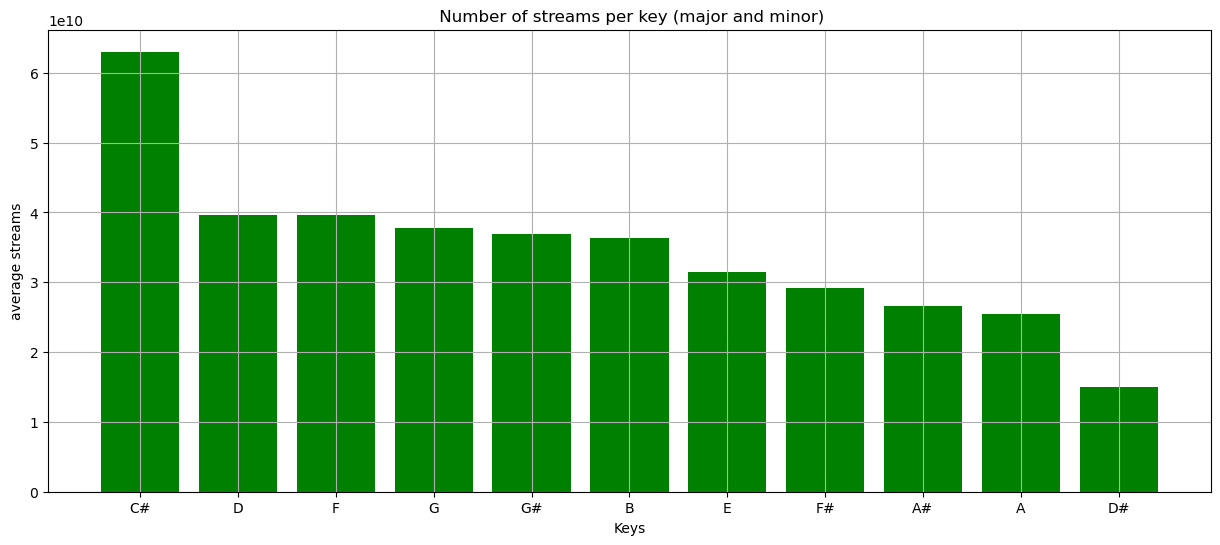

In [97]:
keystreams = final_df.groupby(['key'])['streams'].sum().reset_index() #groups the sum of streams by their keys.
keystreams = keystreams.sort_values(by = 'streams', ascending = False) #sorts the value from greatest to least
plt.figure(figsize=(15, 6)) # sets the size of the plot
plt.bar(keystreams['key'], keystreams['streams'], color = 'green') # sets a bargraph
plt.grid() #sets a grid
plt.xlabel("Keys") #labels the x axis
plt.ylabel("average streams") #labels the y axis
plt.title(" Number of streams per key (major and minor)") #sets a title
plt.show() #shows the graph

## Observation
#### In the bargraph, it can be seen that the C# key has a higher amount of streams compared to rest of the keys. 

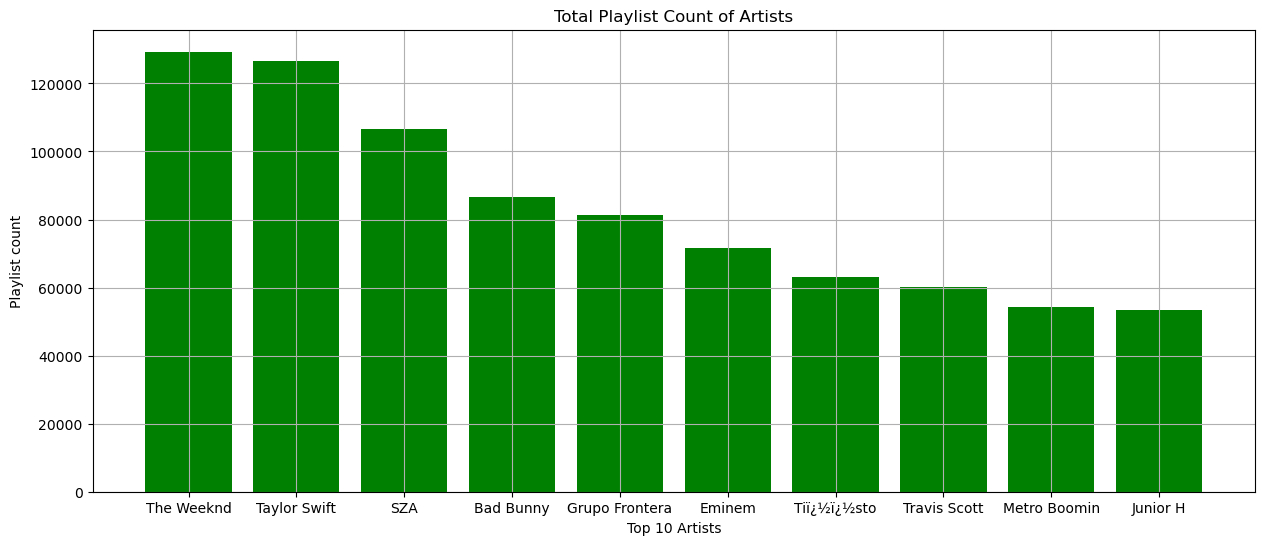

In [43]:
#splits the string of each column whose parameter is ', ' 
artist_split = final_df['artist(s)_name'].str.split(', ') 

exploded_artists = artist_split.explode().reset_index(drop=True) #converts the string into an array

artist_unique = final_df[['in_apple_playlists', 'in_spotify_playlists', 'in_deezer_playlists']].copy()  # Include playlist columns
artist_unique['Artists'] = exploded_artists # creates a new column Artists
artist_unique['Artists'] = artist_unique['Artists'].str.strip() # removes any spaces

# groups the individual artist by their respective playlist
artists_playlist = artist_unique.groupby('Artists')[['in_apple_playlists', 'in_spotify_playlists', 'in_deezer_playlists']].sum()


artists_playlist = artists_playlist.reset_index() # Resets the index

#computes for the total playlist count of the 3 playlist and adds to a new column
artists_playlist['Total Playlists'] = artists_playlist[['in_apple_playlists', 'in_spotify_playlists', 'in_deezer_playlists']].sum(axis=1)

#sorts by ascending o=rder
artists_playlist_sorted = artists_playlist.sort_values(by='Total Playlists', ascending=False) #sorts be descending
artisttop10_playlist = artists_playlist_sorted.head(10) # Displays the first 10 indexes



#plotting the artists in the top 10 of the playlist summary
plt.figure(figsize=(15, 6)) #sets the plot size
plt.grid() #adds a grid
plt.bar(artisttop10_playlist['Artists'], artisttop10_playlist['Total Playlists'], color='green') #creates a bar graph
plt.xlabel("Top 10 Artists") # labels the x axis
plt.ylabel("Playlist count") #labels the y axis
plt.title("Total Playlist Count of Artists") #sets the title
plt.show() #shows the graph

## Observation
### From the plot, it can be seen that The Weeknd has the most playlist of all artits

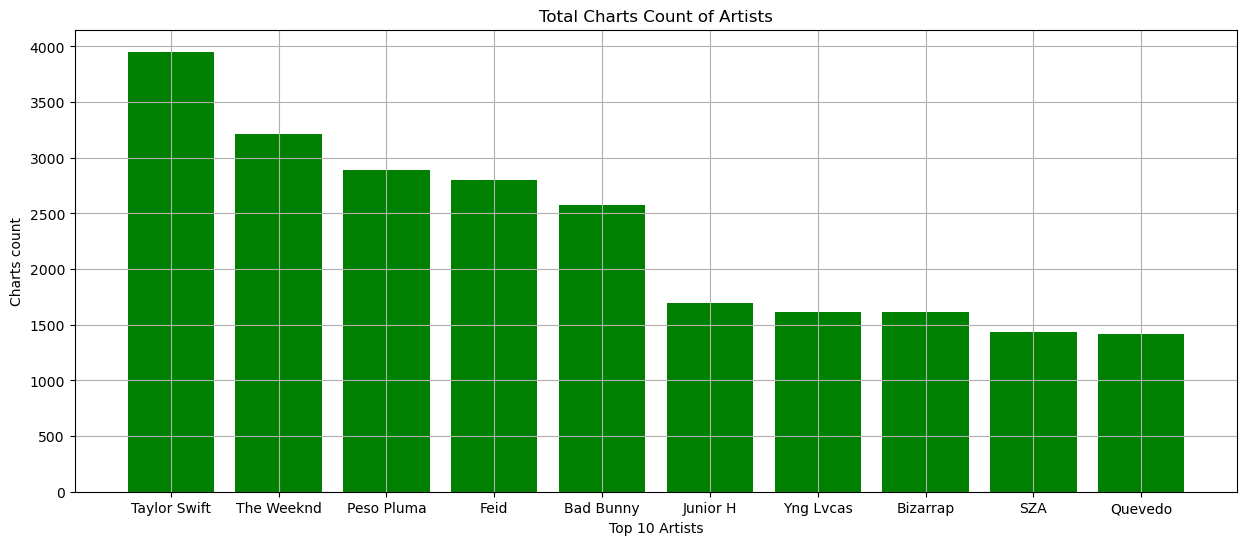

In [74]:
#splitting the artists which are grouped
artist_split = final_df['artist(s)_name'].str.split(', ')

#breaking the string into an array
exploded_artists = artist_split.explode().reset_index(drop=True)

#copying the dataframe from the clean dataframe 
artist_unique = final_df[['in_apple_charts', 'in_spotify_charts', 'in_deezer_charts','in_shazam_charts']].copy()  # Include playlist columns

#Assigning the arrayed artists into a column
artist_unique['Artists'] = exploded_artists
#removing white spaces from the columns
artist_unique['Artists'] = artist_unique['Artists'].str.strip()

#grouping the aritst by their respective charts
artists_charts = artist_unique.groupby('Artists')[['in_apple_charts', 'in_spotify_charts', 'in_deezer_charts','in_shazam_charts']].sum()
#reseting the index of the charts as it outputs "['Artists'] not in index"
artists_charts = artists_charts.reset_index()
#computing the sum of the 3 charts of each artist into a new column[total charts]
artists_charts['Total Charts'] = artists_charts[['in_apple_charts', 'in_spotify_charts', 'in_deezer_charts','in_shazam_charts']].sum(axis=1)

#creating a data frame for the artist and their total charts
artistscharts = artists_charts[['Artists', 'Total Charts']]
#sorting the charts by descending to analyze who has the most. also resets the index
artistscharts_sorted = artistscharts.sort_values(by=['Total Charts'], ascending=False).reset_index(drop=True)
artisttop10_charts= artistscharts_sorted.head(10)  # Displays the first 10 indexes
 
#plotting the artists in the top 10 of the charts
plt.figure(figsize=(15, 6))
plt.grid()
plt.bar(artisttop10_charts['Artists'], artisttop10_charts['Total Charts'], color='green')
plt.xlabel("Top 10 Artists")
plt.ylabel("Charts count")
plt.title("Total Charts Count of Artists")
plt.show()


#### It can be seen that Taylor swift has the highest charts counts in all the 4 charts followed by The Weeknd, Peso Pluma, Feid, Bad Bunny, Junior H, Yng Lvcas, Bizarrap, Sza, and Quevedo.
